# Covid-19 Greece Analytics

Author: [Marios Siganos](https://www.linkedin.com/in/msiganos)  
Email: marios.siganos@gmail.com

## Info

Source: https://covid19.gov.gr/covid19-live-analytics (https://covid19.innews.gr)

Available information on website:
- Cases: Current day, Total
- Tests: PCR, RPT, Total
- Deceased: Current day, Total
- Intubated
- Transfered out of ICU
- Hospitalized (Patient admissions)
- Discharged (Discharges due to healing)
- ICU percent (ICU beds coverage covid19)
- Beds percent (Bed coverage covid19)

Charts:
- Cases: Daily, 3 days average, 7 days average
- Deaths: Daily, 3 days average, 7 days average
- Intubated: Daily, 3 days average, 7 days average
- Age Distribution (0-17, 18-39, 40-64, 65+) of Cases: Cases, Deaths, Intubated
- Gender: Cases regarding women (percent), Cases regarding men (percent)

## Setup

**Import libraries**

In [1]:
import requests
import bs4
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
pd.options.plotting.backend = "plotly"

## Collect and extract data

### Load webpage

Define webpage url

In [4]:
URL_PAGE_INNEWS = "https://covid19.innews.gr/"

Request web page

In [5]:
r = requests.get(URL_PAGE_INNEWS)

Load response to bs

In [6]:
soup = bs4.BeautifulSoup(r.text, 'html.parser')

Find script tag

In [7]:
script_tag = soup.find_all('script')[2]

**Detailed information available from script tag**:
- **daily_stats**: cases, total_cases, deceased, total_deceased, intubated, total_tests, total_rapid_tests, total_recovered, icu_out, hospitalized, discharged, icu_percent, beds_percent, positivity, fatality, positivity_variance, fatality_variance
- **weekly_stats**: cases, deceased, recovered, intubated
- **three_days_stats**: cases, deceased, recovered, intubated
- **last_stats**: cases, deceased, intubated, total_tests, total_cases, total_recovered, icu_out
- **total_stats**: category (cases, deceased, intubated), age group (0_17, 18_39, 40_64, 65plus), gender (male, female)

category/age group|0_17|18_39|40_64|65plus
-|-|-|-|-
cases|cases_0_17_male, cases_0_17_female|cases_18_39_male, cases_18_39_female|cases_40_64_male, cases_40_64_female|cases_65plus_male, cases_65plus_female
deceased|deceased_0_17_male, deceased_0_17_female|deceased_18_39_male, deceased_18_39_female|deceased_40_64_male, deceased_40_64_female|deceased_65plus_male, deceased_65plus_female
intubated|intubated_0_17_male, intubated_0_17_female|intubated_18_39_male, intubated_18_39_female|intubated_40_64_male, intubated_40_64_female|intubated_65plus_male, intubated_65plus_female

### Daily stats

Extract daily_stats

In [8]:
m = re.search("var daily_stats = (\[.*\])", script_tag.string)

In [9]:
daily_stats = json.loads(m.group(1))

In [10]:
print(f"Type: {type(daily_stats)} --> {type(daily_stats[0])}")
print(f"Keys: {list(daily_stats[0].keys())}")

Type: <class 'list'> --> <class 'dict'>
Keys: ['id', 'date', 'cases', 'deceased', 'total_deceased', 'created_at', 'updated_at', 'intubated', 'total_tests', 'total_rapid_tests', 'total_cases', 'total_recovered', 'icu_out', 'hospitalized', 'discharged', 'icu_percent', 'beds_percent', 'positivity', 'fatality', 'positivity_variance', 'fatality_variance']


Dataframe - df_daily_stats

In [11]:
df_daily_stats = pd.DataFrame.from_records(daily_stats)

In [12]:
df_daily_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   787 non-null    int64  
 1   date                 787 non-null    object 
 2   cases                787 non-null    int64  
 3   deceased             787 non-null    int64  
 4   total_deceased       787 non-null    int64  
 5   created_at           787 non-null    object 
 6   updated_at           787 non-null    object 
 7   intubated            787 non-null    int64  
 8   total_tests          787 non-null    int64  
 9   total_rapid_tests    787 non-null    int64  
 10  total_cases          787 non-null    int64  
 11  total_recovered      787 non-null    int64  
 12  icu_out              787 non-null    int64  
 13  hospitalized         714 non-null    float64
 14  discharged           715 non-null    float64
 15  icu_percent          715 non-null    flo

In [13]:
df_daily_stats.describe()

id         cases    deceased  total_deceased   intubated  \
count   787.000000    787.000000  787.000000      787.000000  787.000000   
mean    763.958069   4198.179161   36.324015     6346.322745  322.386277   
std     232.131893   7030.885498   32.660844     9997.984095  243.904954   
min     353.000000      0.000000    0.000000        0.000000    0.000000   
25%     566.500000    262.000000    5.000000        0.000000   76.000000   
50%     765.000000   1558.000000   30.000000        0.000000  333.000000   
75%     964.500000   3551.500000   62.000000    15225.500000  515.000000   
max    1161.000000  50126.000000  134.000000    29073.000000  847.000000   

        total_tests  total_rapid_tests   total_cases  total_recovered  \
count  7.870000e+02       7.870000e+02  7.870000e+02       787.000000   
mean   4.316908e+06       1.268893e+07  5.958142e+05     32275.889454   
std    3.332502e+06       1.982815e+07  8.447134e+05     19680.437714   
min    2.500000e+01       0.000000e+00  1.000000e+00         0.000000   
25%    1.129454e+06       0.000000e+00  1.333000e+04      3804.000000   
50%    4.128578e+06       2.285254e+06  2.557550e+05     45622.000000   
75%    6.778435e+06       1.575205e+07  6.835500e+05     45622.000000   
max    1.097827e+07       6.850288e+07  3.309962e+06     45622.000000   

           icu_out  hospitalized  discharged  icu_percent  beds_percent  
count   787.000000    714.000000  715.000000   715.000000    715.000000  
mean   1852.733164    162.107843  134.223776    37.218308     23.004839  
std    1557.884483    180.958034  157.433540    36.103823     23.717807  
min       0.000000      0.000000    0.000000     0.000000      0.000000  
25%     172.000000      0.000000    0.000000     0.000000      0.000000  
50%    1688.000000    109.000000   76.000000    40.480000     19.460000  
75%    3219.000000    292.750000  229.000000    70.815000     44.995000  
max    4601.000000    654.000000  632.000000    99.850000     86.750000

positivity, fatality, positivity_variance and fatality_variance have only null values  
hospitalized, discharged, icu_percent and beds_percent have missing values

In [14]:
df_daily_stats.tail()

id        date  cases  deceased  total_deceased  \
782  1157  2022-04-23   4175        28           28867   
783  1158  2022-04-25   8413        66           28933   
784  1159  2022-04-26   4727        41           28976   
785  1160  2022-04-27  11487        43           29022   
786  1161  2022-04-28   7580        48           29073   

                      created_at                   updated_at  intubated  \
782  2022-04-23T12:52:58.000000Z  2022-04-23T12:52:58.000000Z        277   
783  2022-04-25T15:59:20.000000Z  2022-04-25T15:59:20.000000Z        279   
784  2022-04-26T12:48:15.000000Z  2022-04-27T12:47:39.000000Z        267   
785  2022-04-27T12:48:58.000000Z  2022-04-28T13:54:21.000000Z        267   
786  2022-04-28T13:38:32.000000Z  2022-04-28T13:38:32.000000Z        260   

     total_tests  total_rapid_tests  ...  total_recovered  icu_out  \
782     10925193           67947353  ...            45622     4591   
783     10935175           68074983  ...            45622     4591   
784     10942503           68131320  ...            45622     4593   
785     10962927           68369948  ...            45622     4599   
786     10978266           68502875  ...            45622     4601   

     hospitalized  discharged  icu_percent  beds_percent  positivity fatality  \
782           NaN         NaN          NaN           NaN        None     None   
783           NaN         NaN          NaN           NaN        None     None   
784         188.0       148.0        57.62         34.73        None     None   
785         191.0       224.0        55.28         33.64        None     None   
786           NaN         NaN          NaN           NaN        None     None   

    positivity_variance fatality_variance  
782                None              None  
783                None              None  
784                None              None  
785                None              None  
786                None              None  

[5 rows x 21 columns]

Last available data (hospitalized, discharged, icu_percent, beds_percent)

In [15]:
df_last_available = df_daily_stats[['date', 'hospitalized', 'discharged', 'icu_percent', 'beds_percent']].dropna()
df_last_available.tail(1)

date  hospitalized  discharged  icu_percent  beds_percent
785  2022-04-27         191.0       224.0        55.28         33.64

### Weekly stats

Extract weekly_stats

In [16]:
m = re.search("var weekly_stats = (\[.*\])", script_tag.string)

In [17]:
weekly_stats = json.loads(m.group(1))

In [18]:
print(f"Type: {type(weekly_stats)} --> {type(weekly_stats[0])}")
print(f"Keys: {list(weekly_stats[0].keys())}")

Type: <class 'list'> --> <class 'dict'>
Keys: ['cases', 'deceased', 'recovered', 'intubated', 'date']


Dataframe - df_weekly_stats

In [19]:
df_weekly_stats = pd.DataFrame.from_records(weekly_stats)

In [20]:
df_weekly_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cases      787 non-null    int64 
 1   deceased   787 non-null    int64 
 2   recovered  787 non-null    int64 
 3   intubated  787 non-null    int64 
 4   date       787 non-null    object
dtypes: int64(4), object(1)
memory usage: 30.9+ KB


In [21]:
df_weekly_stats.describe()

cases    deceased  recovered   intubated
count    787.000000  787.000000      787.0  787.000000
mean    4168.265565   35.725540        0.0  320.945362
std     6731.323338   31.815041        0.0  244.264932
min        0.000000    0.000000        0.0    0.000000
25%      250.000000    4.000000        0.0   73.000000
50%     1832.000000   30.000000        0.0  335.000000
75%     3157.500000   60.500000        0.0  514.500000
max    36220.000000  104.000000        0.0  835.000000

In [22]:
df_weekly_stats.tail()

cases  deceased  recovered  intubated        date
782   6407        46          0        292  2022-04-23
783   6799        48          0        287  2022-04-25
784   6922        45          0        282  2022-04-26
785   7133        45          0        277  2022-04-27
786   7164        42          0        273  2022-04-28

### Three-day stats

Extract three_days_stats

In [23]:
m = re.search("var three_days_stats = (\[.*\])", script_tag.string)

In [24]:
three_days_stats = json.loads(m.group(1))

In [25]:
print(f"Type: {type(three_days_stats)} --> {type(three_days_stats[0])}")
print(f"Keys: {list(three_days_stats[0].keys())}")

Type: <class 'list'> --> <class 'dict'>
Keys: ['cases', 'deceased', 'recovered', 'intubated', 'date']


Dataframe - df_three_days_stats

In [26]:
df_three_days_stats = pd.DataFrame.from_records(three_days_stats)

In [27]:
df_three_days_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787 entries, 0 to 786
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   cases      787 non-null    int64 
 1   deceased   787 non-null    int64 
 2   recovered  787 non-null    int64 
 3   intubated  787 non-null    int64 
 4   date       787 non-null    object
dtypes: int64(4), object(1)
memory usage: 30.9+ KB


In [28]:
df_three_days_stats.describe()

cases    deceased  recovered   intubated
count    787.000000  787.000000      787.0  787.000000
mean    4186.546379   35.941550        0.0  321.736976
std     6856.845917   32.020296        0.0  244.057575
min        0.000000    0.000000        0.0    0.000000
25%      265.500000    4.000000        0.0   74.500000
50%     1780.000000   30.000000        0.0  333.000000
75%     3398.500000   60.000000        0.0  513.500000
max    43252.000000  111.000000        0.0  845.000000

In [29]:
df_three_days_stats.tail()

cases  deceased  recovered  intubated        date
782   5981        33          0        279  2022-04-23
783   6534        41          0        278  2022-04-25
784   5771        45          0        274  2022-04-26
785   8209        50          0        271  2022-04-27
786   7931        44          0        264  2022-04-28

### Last stats

Extract last_stats

In [30]:
m = re.search("var last_stats = (\{.*\})", script_tag.string)

In [31]:
last_stats = json.loads(m.group(1))

In [32]:
print(f"Type: {type(last_stats)}")
print(f"Keys: {list(last_stats.keys())}")

Type: <class 'dict'>
Keys: ['id', 'date', 'cases', 'deceased', 'total_deceased', 'created_at', 'updated_at', 'intubated', 'total_tests', 'total_rapid_tests', 'total_cases', 'total_recovered', 'icu_out', 'hospitalized', 'discharged', 'icu_percent', 'beds_percent', 'positivity', 'fatality', 'positivity_variance', 'fatality_variance']


Series - series_last_stats

In [33]:
series_last_stats = pd.Series(last_stats)

In [34]:
series_last_stats.info()

<class 'pandas.core.series.Series'>
Index: 21 entries, id to fatality_variance
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
13 non-null     object
dtypes: object(1)
memory usage: 336.0+ bytes


In [35]:
series_last_stats

id                                            1161
date                                    2022-04-28
cases                                         7580
deceased                                        48
total_deceased                               29073
created_at             2022-04-28T13:38:32.000000Z
updated_at             2022-04-28T13:38:32.000000Z
intubated                                      260
total_tests                               10978266
total_rapid_tests                         68502875
total_cases                                3309962
total_recovered                              45622
icu_out                                       4601
hospitalized                                  None
discharged                                    None
icu_percent                                   None
beds_percent                                  None
positivity                                    None
fatality                                      None
positivity_variance            

Check if the last record of df_daily_stats is equal to the series_last_stats

In [36]:
df_daily_stats.iloc[-1].equals(series_last_stats)

True

In [37]:
pd.concat([df_daily_stats.iloc[-1], series_last_stats, df_daily_stats.iloc[-1] == series_last_stats], axis=1, keys=['df_daily','last_stats','equal'])

df_daily                   last_stats  \
id                                          1161                         1161   
date                                  2022-04-28                   2022-04-28   
cases                                       7580                         7580   
deceased                                      48                           48   
total_deceased                             29073                        29073   
created_at           2022-04-28T13:38:32.000000Z  2022-04-28T13:38:32.000000Z   
updated_at           2022-04-28T13:38:32.000000Z  2022-04-28T13:38:32.000000Z   
intubated                                    260                          260   
total_tests                             10978266                     10978266   
total_rapid_tests                       68502875                     68502875   
total_cases                              3309962                      3309962   
total_recovered                            45622                        45622   
icu_out                                     4601                         4601   
hospitalized                                 NaN                         None   
discharged                                   NaN                         None   
icu_percent                                  NaN                         None   
beds_percent                                 NaN                         None   
positivity                                  None                         None   
fatality                                    None                         None   
positivity_variance                         None                         None   
fatality_variance                           None                         None   

                     equal  
id                    True  
date                  True  
cases                 True  
deceased              True  
total_deceased        True  
created_at            True  
updated_at            True  
intubated             True  
total_tests           True  
total_rapid_tests     True  
total_cases           True  
total_recovered       True  
icu_out               True  
hospitalized         False  
discharged           False  
icu_percent          False  
beds_percent         False  
positivity           False  
fatality             False  
positivity_variance  False  
fatality_variance    False

### Total stats

Extract total_stats

In [38]:
m = re.search("var total_stats = (\{.*\})", script_tag.string)

In [39]:
total_stats = json.loads(m.group(1))

In [40]:
print(f"Type: {type(total_stats)}")
print(f"Keys: {list(total_stats.keys())}")

Type: <class 'dict'>
Keys: ['id', 'date', 'cases_0_17_male', 'cases_0_17_female', 'cases_18_39_male', 'cases_18_39_female', 'cases_40_64_male', 'cases_40_64_female', 'cases_65plus_male', 'cases_65plus_female', 'deceased_0_17_male', 'deceased_0_17_female', 'deceased_18_39_male', 'deceased_18_39_female', 'deceased_40_64_male', 'deceased_40_64_female', 'deceased_65plus_male', 'deceased_65plus_female', 'created_at', 'updated_at', 'intubated_0_17_male', 'intubated_0_17_female', 'intubated_18_39_male', 'intubated_18_39_female', 'intubated_40_64_male', 'intubated_40_64_female', 'intubated_65plus_male', 'intubated_65plus_female']


Series - total_stats

In [41]:
series_total_stats = pd.Series(total_stats)

In [42]:
series_total_stats.info()

<class 'pandas.core.series.Series'>
Index: 28 entries, id to intubated_65plus_female
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
28 non-null     object
dtypes: object(1)
memory usage: 448.0+ bytes


In [43]:
series_total_stats

id                                                 117
date                                        2022-04-26
cases_0_17_male                                 401014
cases_0_17_female                               377470
cases_18_39_male                                542703
cases_18_39_female                              570588
cases_40_64_male                                548538
cases_40_64_female                              607291
cases_65plus_male                               174612
cases_65plus_female                             185501
deceased_0_17_male                                   3
deceased_0_17_female                                 4
deceased_18_39_male                                156
deceased_18_39_female                               54
deceased_40_64_male                               2939
deceased_40_64_female                             1531
deceased_65plus_male                             12833
deceased_65plus_female                           11456
created_at

### Export raw data

Uncomment to save raw files

In [44]:
# df_daily_stats.to_csv('data/daily_stats-raw.csv', index=False)

In [45]:
# df_three_days_stats.to_csv('data/three_day_stats-raw.csv', index=False)

In [46]:
# df_weekly_stats.to_csv('data/weekly_stats-raw.csv', index=False)

In [47]:
# series_total_stats.to_csv('data/total_stats-raw.csv', index=True)

## Analysis and calculations

### Daily stats

Calculate cummulative sums

In [48]:
df_daily_stats['calculated_cases_cumsum'] = df_daily_stats['cases'].cumsum()

In [49]:
df_daily_stats['calculated_deceased_cumsum'] = df_daily_stats['deceased'].cumsum()

In [50]:
df_daily_stats['calculated_intubated_cumsum'] = df_daily_stats['intubated'].cumsum()

Explore any difference between given column "total_cases" and calculated cases cumsum

In [51]:
df_total_cases_diff = df_daily_stats['total_cases'].diff()
df_total_cases_diff.iloc[0] = df_daily_stats['total_cases'].iloc[0]
df_total_cases_diff = df_total_cases_diff.astype('int')

In [52]:
df_total_cases_diff

0          1
1          2
2          1
3          1
4          2
       ...  
782     4175
783     8413
784     4925
785    11487
786     7580
Name: total_cases, Length: 787, dtype: int64

Add calculated calculated_total_cases_diff to df_daily_stats

In [53]:
df_daily_stats['calculated_total_cases_diff'] = df_total_cases_diff.astype('int')

Check if the sum of 'cases' is equal to the last record of 'calculated_cases_cumsum'

In [54]:
df_daily_stats['cases'].sum() == df_daily_stats['calculated_cases_cumsum'].iloc[-1]

True

Check if the sum of 'deceased' is equal to the last record of 'calculated_deceased_cumsum'

In [55]:
df_daily_stats['deceased'].sum() == df_daily_stats['calculated_deceased_cumsum'].iloc[-1]

True

Check if 'total_cases' values match 'calculated_cases_cumsum' values

In [56]:
(df_daily_stats['total_cases'] == df_daily_stats['calculated_cases_cumsum']).all()

False

Check if 'total_deceased' values match 'calculated_deceased_cumsum' values

In [57]:
(df_daily_stats['total_deceased'] == df_daily_stats['calculated_deceased_cumsum']).all()

False

Check if 'cases' values match 'calculated_total_cases_diff' values

In [58]:
(df_daily_stats['calculated_total_cases_diff'] == df_daily_stats['cases']).all()

False

**There are differences between given column "total_cases" and calculated cummulative sum (cases_cumsum) !!!**

In [59]:
df_daily_stats[df_daily_stats['cases'] != df_daily_stats['calculated_total_cases_diff']][['date','cases','calculated_total_cases_diff','total_cases','calculated_cases_cumsum']]

date  cases  calculated_total_cases_diff  total_cases  \
45   2020-04-11     72                           70         2081   
49   2020-04-15     22                           12         2182   
50   2020-04-16     15                           25         2207   
86   2020-05-22     21                           20         2873   
91   2020-05-27     18                           11         2903   
..          ...    ...                          ...          ...   
764  2022-04-05  18988                        18456      3114591   
765  2022-04-06  15044                        12265      3126856   
771  2022-04-12  15690                        15331      3195887   
778  2022-04-19  10005                        10211      3252248   
784  2022-04-26   4727                         4925      3290895   

     calculated_cases_cumsum  
45                      2083  
49                      2194  
50                      2209  
86                      2876  
91                      2913  
..                       ...  
764                  3105862  
765                  3120906  
771                  3190296  
778                  3246451  
784                  3284900  

[439 rows x 5 columns]

### 3-day stats

Calculate 3-day stats from daily stats

- set moving window equal to 3 observations
- calculate mean
- fill first two nan values to zero
- convert to int (we should normally round but extracted 3-days stats are different)

In [60]:
df_three_days_stats_from_daily = df_daily_stats.set_index('date')[['cases', 'deceased', 'intubated']] \
    .rolling(3) \
    .mean() \
    .fillna(0) \
    .astype(int)

Compare descriptive statistics of both dataframes

In [61]:
pd.concat([
    df_three_days_stats.set_index('date')[['cases', 'deceased', 'intubated']].describe(),
    df_three_days_stats_from_daily.describe()
], axis=1)

cases    deceased   intubated         cases    deceased  \
count    787.000000  787.000000  787.000000    787.000000  787.000000   
mean    4186.546379   35.941550  321.736976   4186.545108   35.941550   
std     6856.845917   32.020296  244.057575   6856.846694   32.020296   
min        0.000000    0.000000    0.000000      0.000000    0.000000   
25%      265.500000    4.000000   74.500000    265.500000    4.000000   
50%     1780.000000   30.000000  333.000000   1780.000000   30.000000   
75%     3398.500000   60.000000  513.500000   3398.500000   60.000000   
max    43252.000000  111.000000  845.000000  43252.000000  111.000000   

        intubated  
count  787.000000  
mean   321.736976  
std    244.057575  
min      0.000000  
25%     74.500000  
50%    333.000000  
75%    513.500000  
max    845.000000

Concatenation of both dataframes to check values

In [62]:
pd.concat([
        df_three_days_stats.set_index('date')[['cases', 'deceased', 'intubated']],
        df_three_days_stats_from_daily
], axis=1)

cases  deceased  intubated  cases  deceased  intubated
date                                                              
2020-02-26      0         0          0      0         0          0
2020-02-27      1         0          0      0         0          0
2020-02-28      1         0          0      1         0          0
2020-02-29      1         0          0      1         0          0
2020-03-01      1         0          0      1         0          0
...           ...       ...        ...    ...       ...        ...
2022-04-23   5981        33        279   5981        33        279
2022-04-25   6534        41        278   6534        41        278
2022-04-26   5771        45        274   5771        45        274
2022-04-27   8209        50        271   8209        50        271
2022-04-28   7931        44        264   7931        44        264

[787 rows x 6 columns]

Check how many values match

In [63]:
(df_three_days_stats.set_index('date')[['cases', 'deceased', 'intubated']] == df_three_days_stats_from_daily).sum()

cases        786
deceased     787
intubated    787
dtype: int64

We have only one different value (on 2020-02-27	we got 0 instead of 1)

### Weekly stats

Calculate weekly stats from daily stats

- set moving window equal to 7 observations
- calculate mean
- fill first six nan values to zero
- convert to int (we should normally round but extracted 3-days stats are different)

In [64]:
df_weekly_stats_from_daily = df_daily_stats.set_index('date')[['cases', 'deceased', 'intubated']] \
    .rolling(7) \
    .mean() \
    .fillna(0) \
    .astype(int)

Compare descriptive statistics of both dataframes

In [65]:
pd.concat([
    df_weekly_stats.set_index('date')[['cases', 'deceased', 'intubated']].describe(),
    df_weekly_stats_from_daily.describe()
], axis=1)

cases    deceased   intubated         cases    deceased  \
count    787.000000  787.000000  787.000000    787.000000  787.000000   
mean    4168.265565   35.725540  320.945362   4168.263024   35.725540   
std     6731.323338   31.815041  244.264932   6731.324913   31.815041   
min        0.000000    0.000000    0.000000      0.000000    0.000000   
25%      250.000000    4.000000   73.000000    250.000000    4.000000   
50%     1832.000000   30.000000  335.000000   1832.000000   30.000000   
75%     3157.500000   60.500000  514.500000   3157.500000   60.500000   
max    36220.000000  104.000000  835.000000  36220.000000  104.000000   

        intubated  
count  787.000000  
mean   320.945362  
std    244.264932  
min      0.000000  
25%     73.000000  
50%    335.000000  
75%    514.500000  
max    835.000000

Concatenation of both dataframes to check values

In [66]:
pd.concat([
        df_weekly_stats.set_index('date')[['cases', 'deceased', 'intubated']],
        df_weekly_stats_from_daily
], axis=1)

cases  deceased  intubated  cases  deceased  intubated
date                                                              
2020-02-26      0         0          0      0         0          0
2020-02-27      0         0          0      0         0          0
2020-02-28      0         0          0      0         0          0
2020-02-29      0         0          0      0         0          0
2020-03-01      1         0          0      0         0          0
...           ...       ...        ...    ...       ...        ...
2022-04-23   6407        46        292   6407        46        292
2022-04-25   6799        48        287   6799        48        287
2022-04-26   6922        45        282   6922        45        282
2022-04-27   7133        45        277   7133        45        277
2022-04-28   7164        42        273   7164        42        273

[787 rows x 6 columns]

Check how many values match

In [67]:
(df_weekly_stats.set_index('date')[['cases', 'deceased', 'intubated']] == df_weekly_stats_from_daily).sum()

cases        785
deceased     787
intubated    787
dtype: int64

### Total stats

Create dataframe from series

In [68]:
df_total_stats = pd.DataFrame(series_total_stats)
df_total_stats.rename(columns={0: 'value'}, inplace=True)
df_total_stats.drop(['id','date','created_at', 'updated_at'], inplace=True)

Split category_agefrom_ageto_gender (e.g. cases_0_17_male) to category, age, and gender columns (cases, 0_17, male)

In [69]:
df_total_stats.reset_index(inplace=True)
df_total_stats['category'] = df_total_stats.apply(lambda row: row['index'].split('_')[0], axis=1)
df_total_stats['age'] = df_total_stats.apply(lambda row: '_'.join(row['index'].split('_')[1:-1]), axis=1)
df_total_stats['gender'] = df_total_stats.apply(lambda row: row['index'].split('_')[-1], axis=1)
df_total_stats.set_index('index', inplace=True)
df_total_stats['value'] = df_total_stats['value'].astype(int)
df_total_stats

value   category     age  gender
index                                                     
cases_0_17_male          401014      cases    0_17    male
cases_0_17_female        377470      cases    0_17  female
cases_18_39_male         542703      cases   18_39    male
cases_18_39_female       570588      cases   18_39  female
cases_40_64_male         548538      cases   40_64    male
cases_40_64_female       607291      cases   40_64  female
cases_65plus_male        174612      cases  65plus    male
cases_65plus_female      185501      cases  65plus  female
deceased_0_17_male            3   deceased    0_17    male
deceased_0_17_female          4   deceased    0_17  female
deceased_18_39_male         156   deceased   18_39    male
deceased_18_39_female        54   deceased   18_39  female
deceased_40_64_male        2939   deceased   40_64    male
deceased_40_64_female      1531   deceased   40_64  female
deceased_65plus_male      12833   deceased  65plus    male
deceased_65plus_female    11456   deceased  65plus  female
intubated_0_17_male           0  intubated    0_17    male
intubated_0_17_female         0  intubated    0_17  female
intubated_18_39_male          5  intubated   18_39    male
intubated_18_39_female        6  intubated   18_39  female
intubated_40_64_male         48  intubated   40_64    male
intubated_40_64_female       27  intubated   40_64  female
intubated_65plus_male       124  intubated  65plus    male
intubated_65plus_female      57  intubated  65plus  female

Total stats per gender (male, female)

In [70]:
df_total_stats.groupby(['category','gender'])[['value']].sum()

value
category  gender         
cases     female  1740850
          male    1666867
deceased  female    13045
          male      15931
intubated female       90
          male        177

Gender labels

In [71]:
gender_labels = df_total_stats['gender'].unique().tolist()
gender_labels

['male', 'female']

Total stats per category (cases, deceased, intubated)

In [72]:
df_total_stats_category = df_total_stats.groupby('category')[['value']].sum()
df_total_stats_category

value
category          
cases      3407717
deceased     28976
intubated      267

Compate daily stats (same as last stats) with total stats

In [73]:
print( f"Total stats: {series_total_stats['date']}" )
print( f"Daily stats: {df_daily_stats.iloc[-1]['date']}" )
print( f"Last stats: {series_last_stats['date']}" )

Total stats: 2022-04-26
Daily stats: 2022-04-28
Last stats: 2022-04-28


In [74]:
pd.DataFrame({
    'total_stats': df_total_stats_category.loc[['cases', 'deceased']]['value'],
    'daily_stats': df_daily_stats.iloc[-1][['total_cases', 'total_deceased']].rename({'total_cases': 'cases', 'total_deceased': 'deceased'})
})

total_stats daily_stats
cases         3407717     3309962
deceased        28976       29073

Category labels

In [75]:
category_labels = df_total_stats['category'].unique().tolist()
category_labels

['cases', 'deceased', 'intubated']

Total stats per age group (0_17, 18_39, 40_64, 65plus)

In [76]:
df_total_stats.groupby(['category', 'age'])[['value']].sum()

value
category  age            
cases     0_17     778484
          18_39   1113291
          40_64   1155829
          65plus   360113
deceased  0_17          7
          18_39       210
          40_64      4470
          65plus    24289
intubated 0_17          0
          18_39        11
          40_64        75
          65plus      181

Age group labels

In [77]:
age_labels = np.char.replace( df_total_stats['age'].unique().astype(np.str_), '_', ' to ')
age_labels = np.char.replace( age_labels, 'plus', '+').tolist()
age_labels

['0 to 17', '18 to 39', '40 to 64', '65+']

Function - Get gender values by category

In [78]:
get_gender_values_by_category = lambda cat: df_total_stats.groupby(['category', 'gender'])[['value']].sum().loc[cat,'value'].to_list()

Example: Get gender values for 'cases'

In [79]:
get_gender_values_by_category('cases')

[1740850, 1666867]

Function - Get age group values by category

In [80]:
get_age_group_values_by_category = lambda cat: df_total_stats.groupby(['category', 'age'])[['value']].sum().loc[cat,'value'].to_list()

Example: Get age group values for 'cases'

In [81]:
get_age_group_values_by_category('cases')

[778484, 1113291, 1155829, 360113]

Function - Get age group values by category and gender

In [82]:
get_age_group_values_by_category_and_gender = lambda cat,gender: df_total_stats.groupby(['category','gender','age'])[['value']].sum().loc[cat,gender]['value']

Example: Get age group values for 'cases' and 'male'

In [83]:
get_age_group_values_by_category_and_gender('cases','male')

age
0_17      401014
18_39     542703
40_64     548538
65plus    174612
Name: value, dtype: int64

Function - Get values for specific category

In [84]:
get_values_for_category = lambda cat: df_total_stats[df_total_stats['category']==cat].copy()

Total stats grouped by category, age and gender

In [85]:
df_total_stats.groupby(['category', 'age', 'gender'])[['value']].sum()

value
category  age    gender        
cases     0_17   female  377470
                 male    401014
          18_39  female  570588
                 male    542703
          40_64  female  607291
                 male    548538
          65plus female  185501
                 male    174612
deceased  0_17   female       4
                 male         3
          18_39  female      54
                 male       156
          40_64  female    1531
                 male      2939
          65plus female   11456
                 male     12833
intubated 0_17   female       0
                 male         0
          18_39  female       6
                 male         5
          40_64  female      27
                 male        48
          65plus female      57
                 male       124

Total stats grouped by category and age with gender as columns and sub totals (pivot table)

In [86]:
pivot = pd.pivot_table(df_total_stats, values=['value'], index=['category', 'age'], columns=['gender'], aggfunc=np.sum)

In [87]:
pivot[('value', 'total')] = pivot[('value', 'female')] + pivot[('value', 'male')]

In [88]:
df_category_sum = pivot.groupby('category').sum()

pivot.loc[('cases', 'total'),:] = df_category_sum.loc['cases', 'value'].values
pivot.loc[('deceased', 'total'),:] = df_category_sum.loc['deceased', 'value'].values
pivot.loc[('intubated', 'total'),:] = df_category_sum.loc['intubated', 'value'].values

In [89]:
pivot.sort_index(inplace=True)

In [90]:
pivot = pivot.astype("int")

In [91]:
pivot.style.format(thousands=',')

### Tests

#### Total and current day tests

Total tests

In [92]:
total_tests = series_last_stats['total_tests'] + series_last_stats['total_rapid_tests']
total_tests

79481141

Today PCR tests

In [93]:
today_pcr_tests = df_daily_stats.iloc[-2:]['total_tests'].diff().iloc[-1].astype(int)
today_pcr_tests

15339

Today rapid tests

In [94]:
today_rapid_tests = df_daily_stats.iloc[-2:]['total_rapid_tests'].diff().iloc[-1].astype(int)
today_rapid_tests

132927

Today tests

In [95]:
today_tests = today_pcr_tests + today_rapid_tests
today_tests

148266

Today cases

In [96]:
today_cases = df_daily_stats['cases'].iloc[-1]
today_cases

7580

Today positivity rate

In [97]:
today_positivity = today_cases / today_tests * 100
today_positivity

5.112433059501167

#### Daily tests

Daily PCR tests

In [98]:
series_tests_pcr = df_daily_stats['total_tests'].diff()
series_tests_pcr[0] = df_daily_stats['total_tests'].iloc[0]
series_tests_pcr = series_tests_pcr.astype(int)
series_tests_pcr

0         25
1         45
2         70
3         80
4         70
       ...  
782     6159
783     9982
784     7328
785    20424
786    15339
Name: total_tests, Length: 787, dtype: int64

Check if there are negative differences

In [99]:
series_tests_pcr[series_tests_pcr<0]

102   -3648
Name: total_tests, dtype: int64

Set daily PCR tests value equal to the previous day where there are negative differences

In [100]:
series_tests_pcr[series_tests_pcr<0] = np.nan
series_tests_pcr.ffill(inplace=True)
series_tests_pcr[series_tests_pcr.isna()]

Series([], Name: total_tests, dtype: float64)

Daily rapid tests

In [101]:
series_tests_rapid = df_daily_stats['total_rapid_tests'].diff()
series_tests_rapid[0] = df_daily_stats['total_rapid_tests'].iloc[0]
series_tests_rapid = series_tests_rapid.astype(int)
series_tests_rapid

0           0
1           0
2           0
3           0
4           0
        ...  
782     67058
783    127630
784     56337
785    238628
786    132927
Name: total_rapid_tests, Length: 787, dtype: int64

Check if there are negative differences

In [102]:
series_tests_rapid[series_tests_rapid<0]

292   -398830
298   -482598
306   -579462
308   -595064
Name: total_rapid_tests, dtype: int64

Set daily rapid tests value equal to the previous day where there are negative differences

In [103]:
series_tests_rapid[series_tests_rapid<0] = np.nan
series_tests_rapid.ffill(inplace=True)
series_tests_rapid[series_tests_rapid.isna()]

Series([], Name: total_rapid_tests, dtype: float64)

Add calculated daily tests (PCR, rapid, total) to df_daily_stats

In [104]:
df_daily_stats['calculated_tests_pcr'] = series_tests_pcr.astype(int)

In [105]:
df_daily_stats['calculated_tests_rapid'] = series_tests_rapid.astype(int)

In [106]:
df_daily_stats['calculated_tests_total'] = df_daily_stats['calculated_tests_pcr'] + df_daily_stats['calculated_tests_rapid']

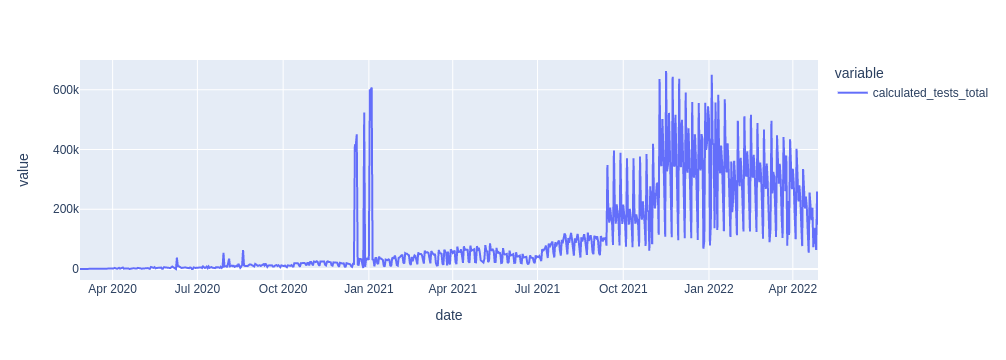

In [107]:
df_daily_stats.set_index('date')[['calculated_tests_total']].plot()

#### 3-day tests

In [108]:
df_three_days_stats['calculated_tests_total'] = df_daily_stats['calculated_tests_total'] \
    .rolling(3) \
    .mean() \
    .fillna(0) \
    .astype(int)

In [109]:
df_three_days_stats

cases  deceased  recovered  intubated        date  calculated_tests_total
0        0         0          0          0  2020-02-26                       0
1        1         0          0          0  2020-02-27                       0
2        1         0          0          0  2020-02-28                      46
3        1         0          0          0  2020-02-29                      65
4        1         0          0          0  2020-03-01                      73
..     ...       ...        ...        ...         ...                     ...
782   5981        33          0        279  2022-04-23                  147315
783   6534        41          0        278  2022-04-25                  138696
784   5771        45          0        274  2022-04-26                   91498
785   8209        50          0        271  2022-04-27                  153443
786   7931        44          0        264  2022-04-28                  156994

[787 rows x 6 columns]

#### Weekly tests

In [110]:
df_weekly_stats['calculated_tests_total'] = df_daily_stats['calculated_tests_total'] \
    .rolling(7) \
    .mean() \
    .fillna(0) \
    .astype(int)

In [111]:
df_weekly_stats

cases  deceased  recovered  intubated        date  calculated_tests_total
0        0         0          0          0  2020-02-26                       0
1        0         0          0          0  2020-02-27                       0
2        0         0          0          0  2020-02-28                       0
3        0         0          0          0  2020-02-29                       0
4        1         0          0          0  2020-03-01                       0
..     ...       ...        ...        ...         ...                     ...
782   6407        46          0        292  2022-04-23                  151490
783   6799        48          0        287  2022-04-25                  153408
784   6922        45          0        282  2022-04-26                  154704
785   7133        45          0        277  2022-04-27                  155158
786   7164        42          0        273  2022-04-28                  150077

[787 rows x 6 columns]

### Positivity rate

Positivity rate (Percent positive / Percent positive rate) is the percentage of all tests performed that are actually positive.

$\text{Positivity rate in %} = \frac{ \text{cases} }{ \text{total tests} } \times 100$

#### Daily positivity rate

In [112]:
series_positivity = df_daily_stats['cases'] / df_daily_stats['calculated_tests_total'] * 100
series_positivity

0      4.000000
1      4.444444
2      1.428571
3      1.250000
4      2.857143
         ...   
782    5.702228
783    6.113566
784    7.424802
785    4.434245
786    5.112433
Length: 787, dtype: float64

Add calculated daily positivity rate to df_daily_stats

In [113]:
df_daily_stats['calculated_positivity'] = series_positivity

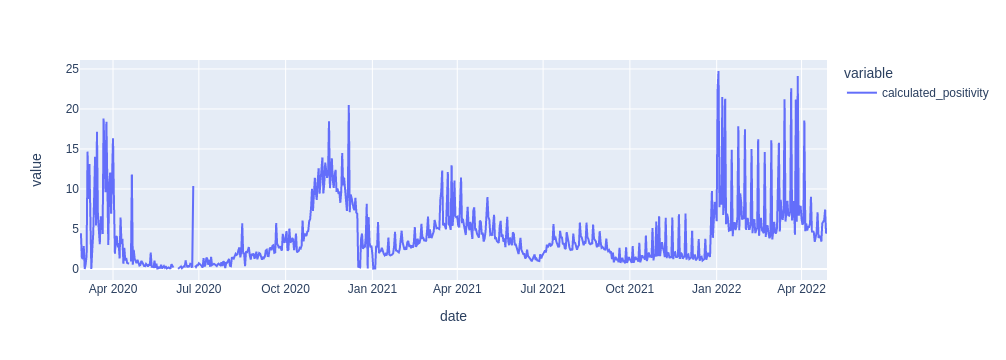

In [114]:
df_daily_stats.set_index('date')['calculated_positivity'].plot()

#### 3-day positivity rate

In [115]:
df_three_days_stats['calculated_positivity'] = df_three_days_stats['cases'] / df_three_days_stats['calculated_tests_total'] * 100

Replace nan and inf values with 0

In [116]:
df_three_days_stats.loc[0:1, 'calculated_positivity'] = 0

In [117]:
df_three_days_stats

cases  deceased  recovered  intubated        date  \
0        0         0          0          0  2020-02-26   
1        1         0          0          0  2020-02-27   
2        1         0          0          0  2020-02-28   
3        1         0          0          0  2020-02-29   
4        1         0          0          0  2020-03-01   
..     ...       ...        ...        ...         ...   
782   5981        33          0        279  2022-04-23   
783   6534        41          0        278  2022-04-25   
784   5771        45          0        274  2022-04-26   
785   8209        50          0        271  2022-04-27   
786   7931        44          0        264  2022-04-28   

     calculated_tests_total  calculated_positivity  
0                         0               0.000000  
1                         0               0.000000  
2                        46               2.173913  
3                        65               1.538462  
4                        73               1.369863  
..                      ...                    ...  
782                  147315               4.060007  
783                  138696               4.711023  
784                   91498               6.307242  
785                  153443               5.349869  
786                  156994               5.051785  

[787 rows x 7 columns]

#### Weekly positivity rate

In [118]:
df_weekly_stats['calculated_positivity'] = df_weekly_stats['cases'] / df_weekly_stats['calculated_tests_total'] * 100

Replace nan and inf values with 0

In [119]:
df_weekly_stats.loc[0:5, 'calculated_positivity'] = 0

In [120]:
df_weekly_stats

cases  deceased  recovered  intubated        date  \
0        0         0          0          0  2020-02-26   
1        0         0          0          0  2020-02-27   
2        0         0          0          0  2020-02-28   
3        0         0          0          0  2020-02-29   
4        1         0          0          0  2020-03-01   
..     ...       ...        ...        ...         ...   
782   6407        46          0        292  2022-04-23   
783   6799        48          0        287  2022-04-25   
784   6922        45          0        282  2022-04-26   
785   7133        45          0        277  2022-04-27   
786   7164        42          0        273  2022-04-28   

     calculated_tests_total  calculated_positivity  
0                         0               0.000000  
1                         0               0.000000  
2                         0               0.000000  
3                         0               0.000000  
4                         0               0.000000  
..                      ...                    ...  
782                  151490               4.229322  
783                  153408               4.431972  
784                  154704               4.474351  
785                  155158               4.597249  
786                  150077               4.773550  

[787 rows x 7 columns]

### Fatality rate

Case fatality rate (CFR) is the proportion of people diagnosed with the disease, who end up dying of it.

$\text{Fatality rate in %} = \frac{ \text{deaths} }{ \text{confirmed cases} } \times 100$

#### Total fatality

Today fatality rate

Using 'total_deceased' and 'total_cases' from df_daily_stats

In [121]:
df_daily_stats.iloc[-1]['total_deceased'] / df_daily_stats.iloc[-1]['total_cases'] * 100

0.8783484523387277

Using 'calculated_deceased_cumsum' and 'calculated_cases_cumsum' from df_daily_stats

In [122]:
df_daily_stats.iloc[-1]['calculated_deceased_cumsum'] / df_daily_stats.iloc[-1]['calculated_cases_cumsum'] * 100

0.8652326127954668

Using 'deceased' and 'cases' from df_total_stats

In [123]:
df_total_stats[df_total_stats['category']=='deceased']['value'].sum() / df_total_stats[df_total_stats['category']=='cases']['value'].sum() * 100

0.8503053510605487

#### Fatality rate by age group

In [124]:
series_deceased_by_age = df_total_stats[df_total_stats['category']=='deceased'].groupby('age')['value'].sum()
series_cases_by_age = df_total_stats[df_total_stats['category']=='cases'].groupby('age')['value'].sum()
series_fatality_by_age = series_deceased_by_age / series_cases_by_age * 100
series_fatality_by_age

age
0_17      0.000899
18_39     0.018863
40_64     0.386735
65plus    6.744827
Name: value, dtype: float64

In [125]:
series_fatality_by_age.rename('fatality').to_frame().style.format(precision=3).background_gradient(cmap='Blues')

#### Fatality rate by gender

In [126]:
series_deceased_by_gender = df_total_stats[df_total_stats['category']=='deceased'].groupby('gender')['value'].sum()
series_cases_by_gender = df_total_stats[df_total_stats['category']=='cases'].groupby('gender')['value'].sum()
series_fatality_by_gender = series_deceased_by_gender / series_cases_by_gender * 100
series_fatality_by_gender

gender
female    0.749347
male      0.955745
Name: value, dtype: float64

In [127]:
series_fatality_by_gender.rename('fatality').to_frame().style.format(precision=2).background_gradient(cmap='Blues')

#### Fatality by gender and age group

In [128]:
series_deceased_by_age_and_gender = df_total_stats[df_total_stats['category']=='deceased'].groupby(['age', 'gender'])['value'].sum()
series_cases_by_age_and_gender = df_total_stats[df_total_stats['category']=='cases'].groupby(['age', 'gender'])['value'].sum()
series_fatality_by_age_and_gender = series_deceased_by_age_and_gender / series_cases_by_age_and_gender * 100
series_fatality_by_age_and_gender

age     gender
0_17    female    0.001060
        male      0.000748
18_39   female    0.009464
        male      0.028745
40_64   female    0.252103
        male      0.535788
65plus  female    6.175708
        male      7.349438
Name: value, dtype: float64

In [129]:
series_fatality_by_age_and_gender.rename('fatality').to_frame().style.format(precision=4).background_gradient(cmap='Blues')

#### Daily fatality rate - Cumsum

Calculated using total values (up to current day) and not daily values.

Using 'total_deceased' and 'total_cases' from df_daily_stats

In [130]:
series_fatality = df_daily_stats['total_deceased'] / df_daily_stats['total_cases'] * 100
series_fatality

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
782    0.880747
783    0.880501
784    0.880490
785    0.878820
786    0.878348
Length: 787, dtype: float64

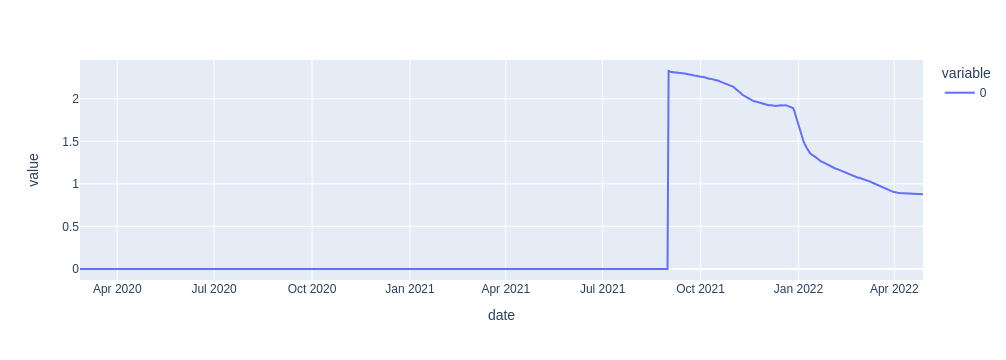

In [131]:
series_fatality.index = df_daily_stats['date']
series_fatality.plot()

There are missing values (0) in 'total_deceased' from df_daily_stats

Using 'calculated_deceased_cumsum' and 'calculated_cases_cumsum' from df_daily_stats

In [132]:
series_fatality = df_daily_stats['calculated_deceased_cumsum'] / df_daily_stats['calculated_cases_cumsum'] * 100
series_fatality

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
782    0.867698
783    0.867485
784    0.867485
785    0.865766
786    0.865233
Length: 787, dtype: float64

Add calculated daily fatality rate to df_daily_stats

In [133]:
df_daily_stats['calculated_fatality'] = series_fatality

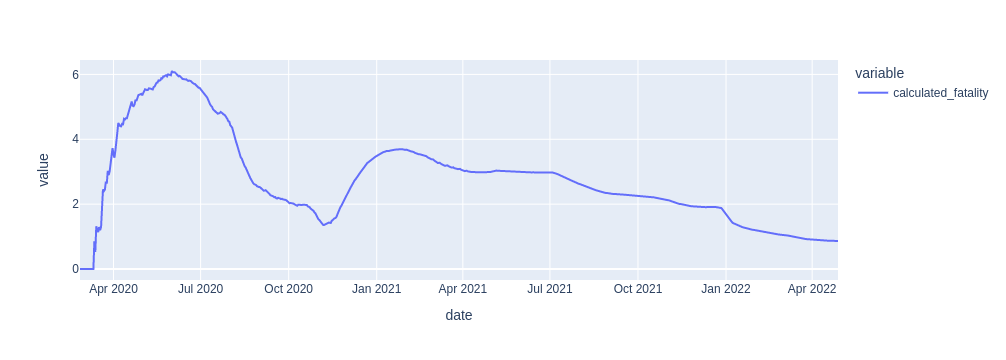

In [134]:
df_daily_stats.set_index('date')['calculated_fatality'].plot()

We have only two different values (on 2020-03-01 and 2020-03-02 where we got 0 instead of 1)

### Groups by date (day, month, year)

In [135]:
df = df_daily_stats.copy()

In [136]:
df['date'] = pd.to_datetime(df['date'])

In [137]:
df['calculated_date_day'] = df['date'].dt.day_name()

In [138]:
df['calculated_date_month'] = df['date'].dt.month_name()

In [139]:
df['calculated_date_year'] = df['date'].dt.year

In [140]:
days_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [141]:
months_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#### Stats per day of week

Total cases, deceased and tests per day of week

In [142]:
df_group_day = df.groupby('calculated_date_day')[['cases', 'deceased', 'calculated_tests_total']].sum().reindex(days_list)
df_group_day['positivity'] = df_group_day['cases'] / df_group_day['calculated_tests_total'] * 100
df_group_day['fatality'] = df_group_day['deceased'] / df_group_day['cases'] * 100
df_group_day.rename({'calculated_tests_total': 'tests'}, axis=1, inplace=True)
df_group_day.index.rename('day', inplace=True)
df_group_day

cases  deceased     tests  positivity  fatality
day                                                        
Monday     450190      4477   5044003    8.925252  0.994469
Tuesday    595486      4197  17967739    3.314196  0.704802
Wednesday  531766      4154  12341561    4.308742  0.781171
Thursday   508538      4144  11704587    4.344775  0.814885
Friday     496372      4107  13977614    3.551193  0.827404
Saturday   443706      3721  13180492    3.366384  0.838618
Sunday     277909      3787   8364446    3.322503  1.362676

Mean cases, deceased and tests per day of week

In [143]:
df_group_day_mean = df.groupby('calculated_date_day')[['cases', 'deceased', 'calculated_tests_total']].mean().reindex(days_list)
df_group_day_mean.rename({'calculated_tests_total': 'tests'}, axis=1, inplace=True)
df_group_day_mean.index.rename('day', inplace=True)
df_group_day_mean

cases   deceased          tests
day                                             
Monday     3983.982301  39.619469   44637.194690
Tuesday    5269.787611  37.141593  159006.539823
Wednesday  4705.893805  36.761062  109217.353982
Thursday   4460.859649  36.350877  102671.815789
Friday     4431.892857  36.669643  124800.125000
Saturday   3961.660714  33.223214  117682.964286
Sunday     2526.445455  34.427273   76040.418182

Cases (total, mean), deceased (total, mean), tests (total, mean), positivity and fatality per day of week

In [144]:
cols = pd.MultiIndex.from_tuples([("cases", "cases_total"), 
                                  ("cases", "cases_mean"), 
                                  ("deceased", "deceased_total"),
                                  ("deceased", "deceased_mean"),
                                  ("tests", "tests_total"),
                                  ("tests", "tests_mean"),
                                  ("metrics", "positivity"),
                                  ("metrics", "fatality"),
                                 ])
cols

MultiIndex([(   'cases',    'cases_total'),
            (   'cases',     'cases_mean'),
            ('deceased', 'deceased_total'),
            ('deceased',  'deceased_mean'),
            (   'tests',    'tests_total'),
            (   'tests',     'tests_mean'),
            ( 'metrics',     'positivity'),
            ( 'metrics',       'fatality')],
           )

In [145]:
df_group_day_combined = pd.concat(
    [df_group_day[['cases', 'deceased', 'tests']].add_suffix('_total'),
     df_group_day[['positivity', 'fatality']],
     df_group_day_mean[['cases', 'deceased', 'tests']].add_suffix('_mean')
    ], axis=1
)

In [146]:
df_group_day_combined = df_group_day_combined.reindex(columns=cols.get_level_values(1))

In [147]:
df_group_day_combined.columns = cols

In [148]:
df_group_day_combined.rename({
    'cases_total': 'total',
    'cases_mean': 'mean',
    'deceased_total': 'total',
    'deceased_mean': 'mean',
    'tests_total': 'total',
    'tests_mean': 'mean',
}, axis=1, inplace=True)

In [149]:
df_group_day_combined.style.format(
    thousands=",", precision=0,
    formatter={
        ("metrics", "positivity"): "{:.2f}",
        ("metrics", "fatality"): "{:.2f}",
    }).background_gradient(cmap='Blues')

#### Stats per month

Total cases, deceased and tests per month

In [150]:
df_group_month = df.groupby('calculated_date_month')[['cases', 'deceased', 'calculated_tests_total']].sum().reindex(months_list)
df_group_month['positivity'] = df_group_month['cases'] / df_group_month['calculated_tests_total'] * 100
df_group_month['fatality'] = df_group_month['deceased'] / df_group_month['cases'] * 100
df_group_month.rename({'calculated_tests_total': 'tests'}, axis=1, inplace=True)
df_group_month.index.rename('month', inplace=True)
df_group_month

cases  deceased     tests  positivity  fatality
month                                                      
January    747231      3603  12285100    6.082417  0.482180
February   513497      2979   9642425    5.325393  0.580140
March      683018      3258   9835911    6.944125  0.477001
April      365742      3885   7085543    5.161806  1.062224
May         57578      1749   1489753    3.864936  3.037619
June        20851       609   1257124    1.658627  2.920723
July        68971       267   2388808    2.887256  0.387119
August      98534       742   3135302    3.142728  0.753040
September   74003      1204   4976818    1.486954  1.626961
October    107254      1333   6338643    1.692066  1.242844
November   262081      3939  10946198    2.394265  1.502970
December   305207      5019  13198817    2.312381  1.644458

Mean cases, deceased and tests per month

In [151]:
df_group_month_mean = df.groupby('calculated_date_month')[['cases', 'deceased', 'calculated_tests_total']].mean().reindex(months_list)
df_group_month_mean.rename({'calculated_tests_total': 'tests'}, axis=1, inplace=True)
df_group_month_mean.index.rename('month', inplace=True)
df_group_month_mean

cases   deceased          tests
month                                            
January    12052.112903  58.112903  198146.774194
February    8558.283333  49.650000  160707.083333
March       7344.279570  35.032258  105762.483871
April       4203.931034  44.655172   81443.022989
May          943.901639  28.672131   24422.180328
June         372.339286  10.875000   22448.642857
July        1112.435484   4.306452   38529.161290
August      1589.258065  11.967742   50569.387097
September   1233.383333  20.066667   82946.966667
October     1729.903226  21.500000  102236.177419
November    4368.016667  65.650000  182436.633333
December    4922.693548  80.951613  212884.145161

Cases (total, mean), deceased (total, mean), tests (total, mean), positivity and fatality per month

In [152]:
df_group_month_combined = pd.concat(
    [df_group_month[['cases', 'deceased', 'tests']].add_suffix('_total'),
     df_group_month[['positivity', 'fatality']],
     df_group_month_mean[['cases', 'deceased', 'tests']].add_suffix('_mean')
    ], axis=1
)

In [153]:
df_group_month_combined = df_group_month_combined.reindex(columns=cols.get_level_values(1))

In [154]:
df_group_month_combined.columns = cols

In [155]:
df_group_month_combined.rename({
    'cases_total': 'total',
    'cases_mean': 'mean',
    'deceased_total': 'total',
    'deceased_mean': 'mean',
    'tests_total': 'total',
    'tests_mean': 'mean',
}, axis=1, inplace=True)

In [156]:
df_group_month_combined.style.format(
    thousands=",", precision=0,
    formatter={
        ("metrics", "positivity"): "{:.2f}",
        ("metrics", "fatality"): "{:.2f}",
    }).background_gradient(cmap='Blues')

#### Stats per year

Total cases, deceased and tests per year

In [157]:
df_group_year = df.groupby('calculated_date_year')[['cases', 'deceased', 'calculated_tests_total']].sum()
df_group_year['positivity'] = df_group_year['cases'] / df_group_year['calculated_tests_total'] * 100
df_group_year['fatality'] = df_group_year['deceased'] / df_group_year['cases'] * 100
df_group_year.rename({'calculated_tests_total': 'tests'}, axis=1, inplace=True)
df_group_year.index.rename('year', inplace=True)
df_group_year.style.format(thousands=",", precision=2).background_gradient(cmap='Blues')

#### Stats per year per month

Total cases, deceased and tests per year and month

In [158]:
df_group_year_month = df.groupby(['calculated_date_month', 'calculated_date_year',])[['cases', 'deceased', 'calculated_tests_total']].sum().reindex(months_list, level=0)
df_group_year_month['positivity'] = df_group_year_month['cases'] / df_group_year_month['calculated_tests_total'] * 100
df_group_year_month['fatality'] = df_group_year_month['deceased'] / df_group_year_month['cases'] * 100
df_group_year_month.rename({'calculated_tests_total': 'tests'}, axis=1, inplace=True)
df_group_year_month.index.rename(['month', 'year'], inplace=True)
df_group_year_month.style.format(thousands=",", precision=2).background_gradient(cmap='Blues')\
                                                            .highlight_min(props='color: red')\
                                                            .highlight_max(props='border: 1px solid red')

#### Stats per month per year

Total cases, deceased and tests per month and year

In [159]:
df_group_month_year = df.groupby(['calculated_date_year', 'calculated_date_month'])[['cases', 'deceased', 'calculated_tests_total']].sum().reindex(months_list, level=1)
df_group_month_year['positivity'] = df_group_month_year['cases'] / df_group_month_year['calculated_tests_total'] * 100
df_group_month_year['fatality'] = df_group_month_year['deceased'] / df_group_month_year['cases'] * 100
df_group_month_year.rename({'calculated_tests_total': 'tests'}, axis=1, inplace=True)
df_group_month_year.index.rename(['year', 'month'], inplace=True)
df_group_month_year.style.format(thousands=",", precision=2).background_gradient(cmap='Blues')\
                                                            .highlight_min(props='color: red')\
                                                            .highlight_max(props='border: 1px solid red')

## Data visualizations - Plotly

### Gender

#### Cases

Pie chart

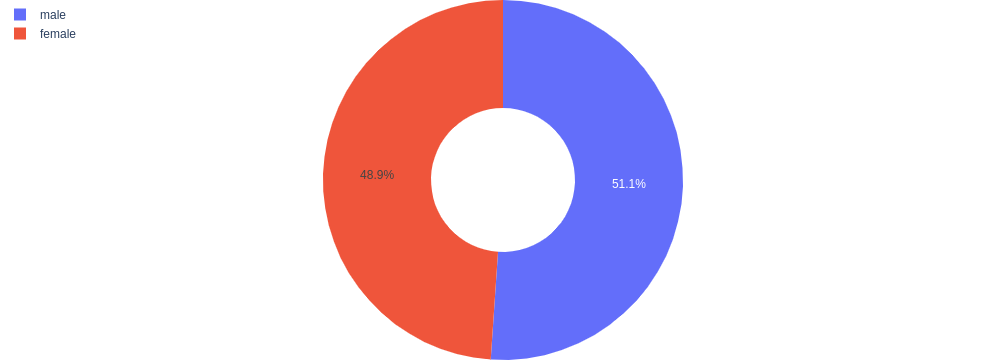

In [160]:
figure=go.Figure(
    data=[
        go.Pie(
            labels=gender_labels,
            values=get_gender_values_by_category('cases'),
            hole=0.4
        )
    ],
    layout={
        'margin': {'l': 0, 'b': 0, 't': 0, 'r': 0},
        'legend': {'x': 0, 'y': 1, 'orientation': 'v'},
    }
)
figure.show()

#### Deceased

Pie chart

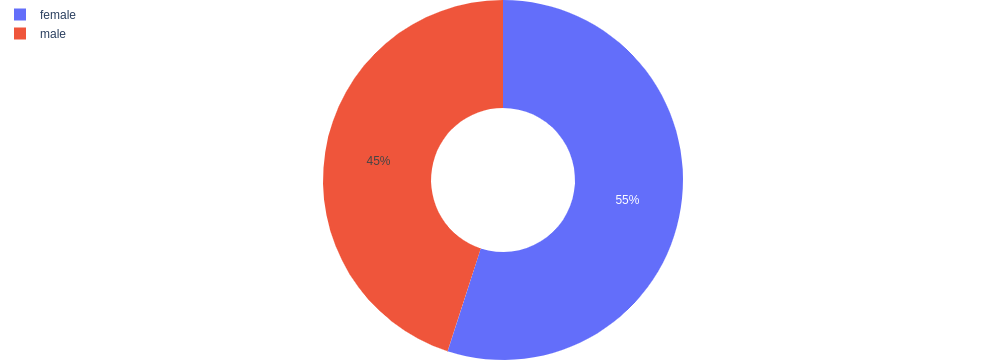

In [161]:
figure = go.Figure(
    data=[
        go.Pie(
            labels=gender_labels,
            values=get_gender_values_by_category('deceased'),
            hole=0.4,
            name = "",
        )
    ],
    layout={
        'margin': {'l': 0, 'b': 0, 't': 0, 'r': 0},
        'legend': {'x': 0, 'y': 1, 'orientation': 'v'},
    }
)

figure.update_traces(
    hovertext = [f'Fatality: {val:.3f} %' for val in series_fatality_by_gender.to_list()],
    hovertemplate = "%{label}<br>%{value}<br>%{text}<br>"
)

figure.show()

#### Intubated

Pie chart

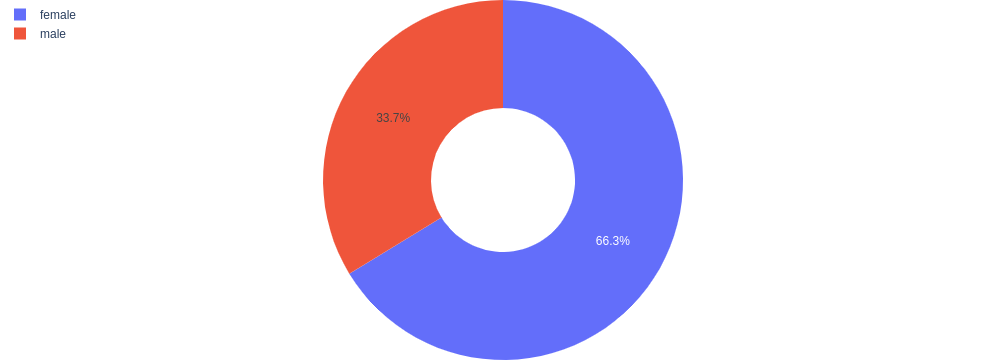

In [162]:
figure=go.Figure(
    data=[
        go.Pie(
            labels=gender_labels,
            values=get_gender_values_by_category('intubated'),
            hole=0.4
        )
    ],
    layout={
        'margin': {'l': 0, 'b': 0, 't': 0, 'r': 0},
        'legend': {'x': 0, 'y': 1, 'orientation': 'v'},
    }
)
figure.show()

#### Combined

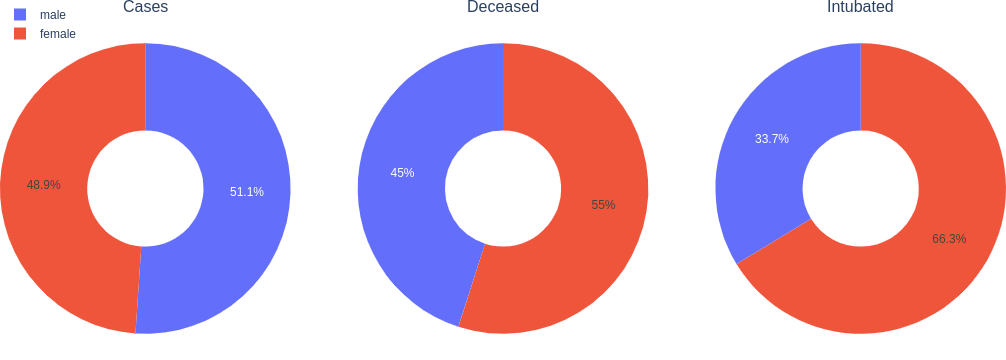

In [163]:
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Cases", "Deceased", "Intubated")
)

categories = ['cases', 'deceased', 'intubated']

for i,cat in enumerate(categories):
    fig.add_trace(
            go.Pie(
                labels=gender_labels,
                values=get_gender_values_by_category(cat),
                name=cat.capitalize(),
                hole=0.4,
            ),
        row=1, col=i+1
    )

fig.update_layout(
    margin = {'l': 0, 'b': 0, 't': 0, 'r': 0},
    legend = {'x': 0, 'y': 1.05, 'orientation': 'v'}
)

fig.show()

### Age groups

Stats by age group - Bar chart (grouped)

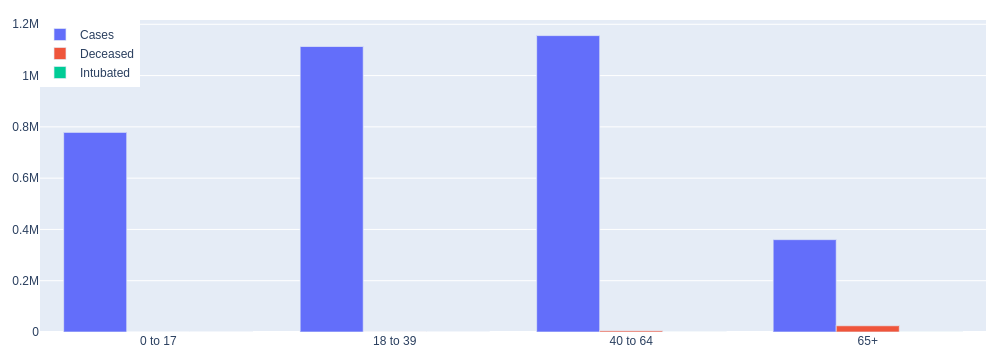

In [164]:
fig = go.Figure()

categories = ['cases', 'deceased', 'intubated']

for cat in categories:
    fig.add_trace(go.Bar(
        x=age_labels,
        y=get_age_group_values_by_category(cat),
        name=cat.capitalize(),
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'legend': {'x': 0, 'y': 1.0},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'xaxis': {'fixedrange': True},
    'hovermode': 'x unified'
})

fig.update_traces(
                  hovertext = [f'Fatality: {val:.3f} %' for val in series_fatality_by_age.to_list()],
                  selector=dict(name="Deceased"))

fig.show()

Stats by age group - Pie chart (combined)

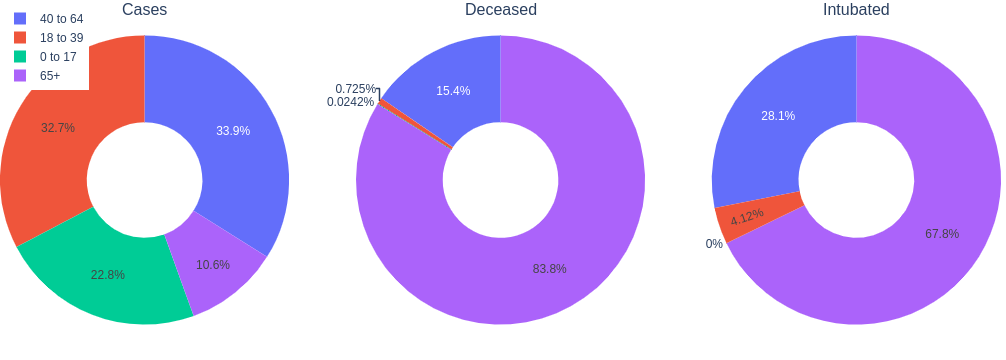

In [165]:
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Cases", "Deceased", "Intubated")
)

categories = ['cases', 'deceased', 'intubated']

for i,cat in enumerate(categories):
    fig.add_trace(
            go.Pie(
                labels=age_labels,
                values=get_age_group_values_by_category(cat),
                name=cat.capitalize(),
                hole=0.4,
            ),
        row=1, col=i+1
    )

fig.update_layout(
    margin = {'l': 0, 'b': 0, 't': 0, 'r': 0},
    legend = {'x': 0, 'y': 1.05, 'orientation': 'v', 'traceorder': 'normal',}, # 'bgcolor': 'rgba(0,0,0,0)'
)

fig.show()

### Age groups and gender

Stats by age group and gender - Bar chart grouped and stacked (plotly express)

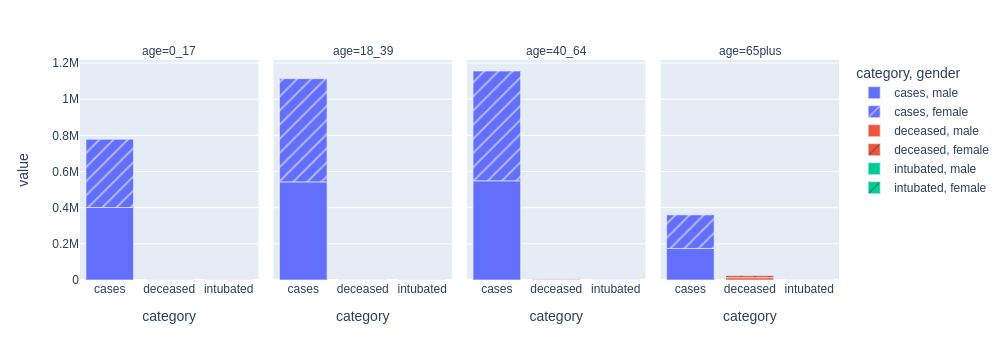

In [166]:
fig = px.bar(df_total_stats, x='category', y='value', color='category', pattern_shape='gender', facet_col='age')
fig.show()

Stats by age group and gender - Bar chart grouped and stacked

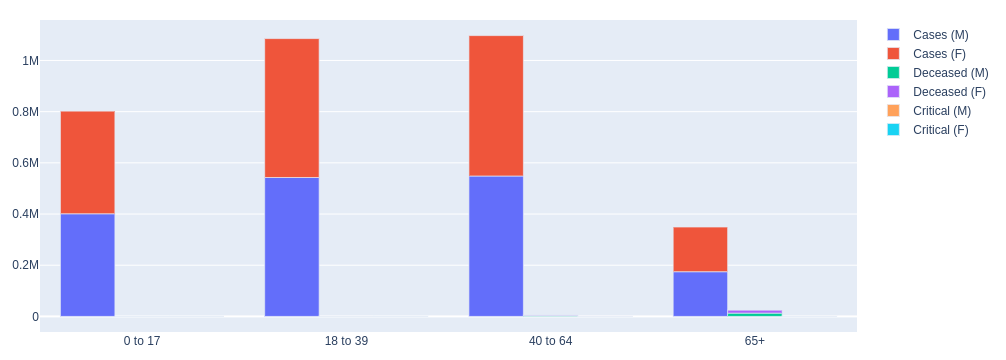

In [167]:
figure={
        'data': [
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('cases','male'),
                'type': 'bar',
                'name': 'Cases (M)',
                'offsetgroup':0
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('cases','male'),
                'type': 'bar',
                'name': 'Cases (F)',
                'offsetgroup':0,
                'base': get_age_group_values_by_category_and_gender('cases','male'),
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('deceased','male'),
                'type': 'bar',
                'name': 'Deceased (M)',
                'offsetgroup':1
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('deceased','female'),
                'type': 'bar',
                'name': 'Deceased (F)',
                'offsetgroup':1,
                'base': get_age_group_values_by_category_and_gender('deceased','male'),
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('intubated','male'),
                'type': 'bar',
                'name': 'Critical (M)',
                'offsetgroup':2
            },
            {
                'x': age_labels,
                'y': get_age_group_values_by_category_and_gender('intubated','female'),
                'type': 'bar',
                'name': 'Critical (F)',
                'offsetgroup':2,
                'base': get_age_group_values_by_category_and_gender('intubated','male'),
            },
        ],
        'layout': {
            'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
            'yaxis': {'fixedrange': True, 'hoverformat': ','},
            'xaxis': {'fixedrange': True},
            'hovermode': 'x unified'
        }
}
figure=go.Figure(figure)
figure.show()

Stats by age group and gender - Sunburst chart

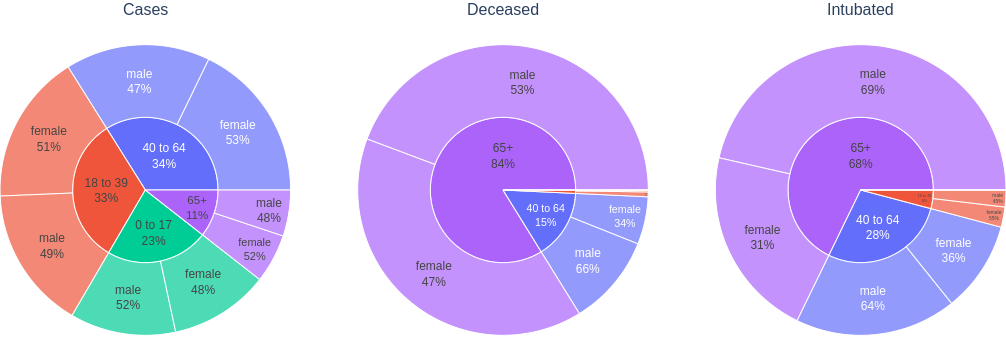

In [168]:
fig = make_subplots(
    rows=1, cols=3,
    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]],
    subplot_titles=("Cases", "Deceased", "Intubated")
)

for i,cat in enumerate(df_total_stats['category'].unique()):
    df = df_total_stats[df_total_stats['category']==cat].copy()
    df['age'] = df['age'].str.replace('_', ' to ')
    df['age'] = df['age'].str.replace('plus', '+')
    
    fig_tmp = px.sunburst(df, path=['age', 'gender'], values='value')
    
    fig.add_trace(go.Sunburst(
        ids=fig_tmp.data[0].ids,
        labels= fig_tmp.data[0].labels,
        parents=fig_tmp.data[0].parents,
        values=fig_tmp.data[0].values,
        branchvalues="total",
        name=cat,
        # maxdepth=1
    ), row=1, col=i+1)

fig.update_layout(margin = dict(t=20, l=0, r=0, b=0))
fig.update_traces(
    textinfo="label+percent parent",
    insidetextorientation='horizontal',
)

fig.update_traces(
    hovertext = [f'Fatality: {val:.3f} %' for val in series_fatality_by_age.to_list()],
    selector=dict(name="deceased")
)

fig.show()

Find the corresponding fatality rates for the ids of the sunburst chart

In [169]:
df_fatality_by_age_and_gender = series_fatality_by_age_and_gender.reset_index()
df_fatality_by_age_and_gender['ids'] = df_fatality_by_age_and_gender['age'] + '/' + df_fatality_by_age_and_gender['gender']
df_fatality_by_age_and_gender.set_index('ids', inplace=True)
df_fatality_by_age_and_gender

age  gender     value
ids                                    
0_17/female      0_17  female  0.001060
0_17/male        0_17    male  0.000748
18_39/female    18_39  female  0.009464
18_39/male      18_39    male  0.028745
40_64/female    40_64  female  0.252103
40_64/male      40_64    male  0.535788
65plus/female  65plus  female  6.175708
65plus/male    65plus    male  7.349438

Deceased by age group and gender with fatality rate - Sunburst chart

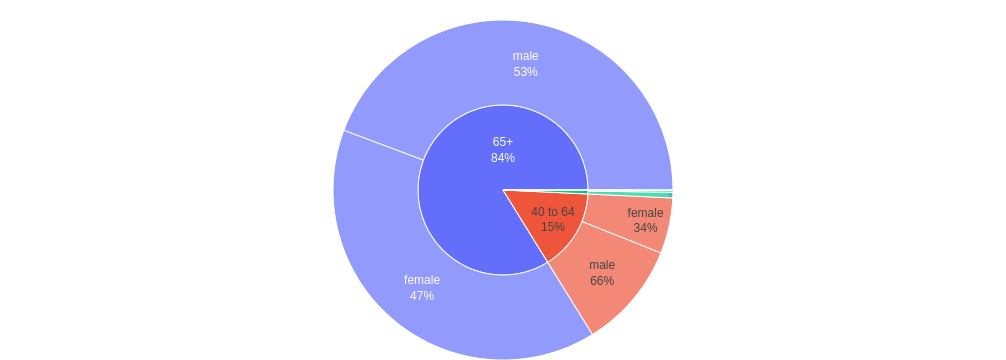

In [170]:
cat = 'deceased'

fig = go.Figure()

df = get_values_for_category(cat)

df['age'].replace({'0_17': '0 to 17', '18_39': '18 to 39', '40_64': '40 to 64', '65plus': '65+'}, inplace=True)

fig_tmp = px.sunburst(df, path=['age', 'gender'], values='value')

fig_ids = [ item.replace(' to ', '_').replace('+', 'plus') for item in fig_tmp.data[0].ids]

sunburst_fatality_values = df_fatality_by_age_and_gender.loc[fig_ids[0:-4]]['value'].round(3).to_list()
sunburst_fatality_values.extend(series_fatality_by_age.loc[fig_ids[-4:]].round(3).to_list())

fig.add_trace(go.Sunburst(
    ids=fig_tmp.data[0].ids,
    labels= fig_tmp.data[0].labels,
    parents=fig_tmp.data[0].parents,
    values=fig_tmp.data[0].values,
    branchvalues="total",
    name=cat,
))

fig.update_layout(
    margin = dict(t=20, l=0, r=0, b=0),
)

fig.update_traces(
    textinfo="label+percent parent",
    insidetextorientation='horizontal',
    hovertext = [f'Fatality: {val:.3f} %' for val in sunburst_fatality_values],
)

fig.show()

### Time series

#### Daily stats

Line chart

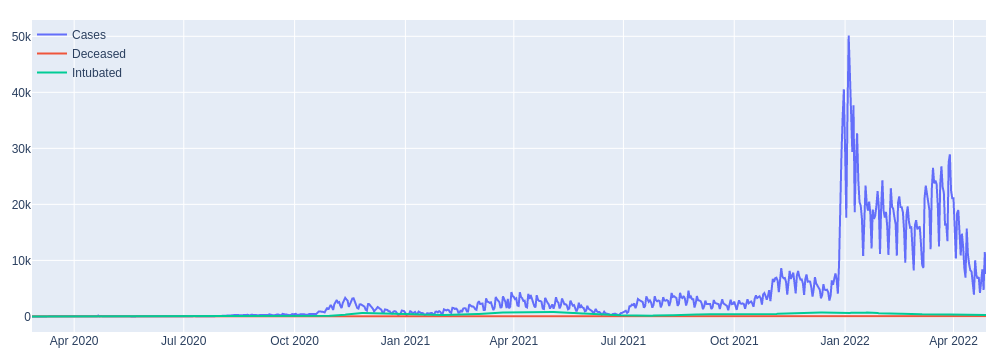

In [171]:
fig = go.Figure()

categories = ['cases', 'deceased', 'intubated']

for cat in categories:
    fig.add_trace(go.Scatter(
        x=df_daily_stats['date'].to_list(),
        y=df_daily_stats[cat].to_list(),
        mode='lines', # +markers
        name=cat.capitalize()
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    # 'xaxis': {'fixedrange': True},
    'hovermode': 'x unified',
    'legend': {'x': 0, 'y': 1, 'bgcolor': 'rgba(0,0,0,0)'},
})

fig.show()

#### 3-Day stats

Line chart

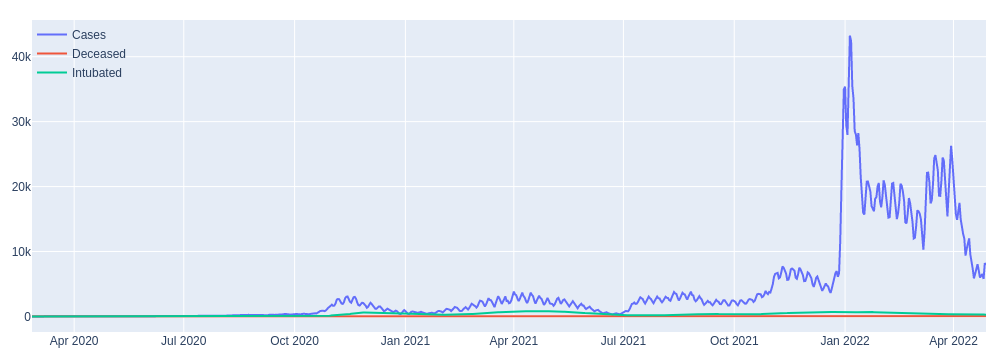

In [172]:
fig = go.Figure()

categories = ['cases', 'deceased', 'intubated']

for cat in categories:
    fig.add_trace(go.Scatter(
        x=df_three_days_stats['date'].to_list(),
        y=df_three_days_stats[cat].to_list(),
        mode='lines', # +markers
        name=cat.capitalize()
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'legend': {'x': 0, 'y': 1, 'bgcolor': 'rgba(0,0,0,0)'},
    'hovermode': 'x unified'
})

fig.show()

#### Weekly stats

Line chart

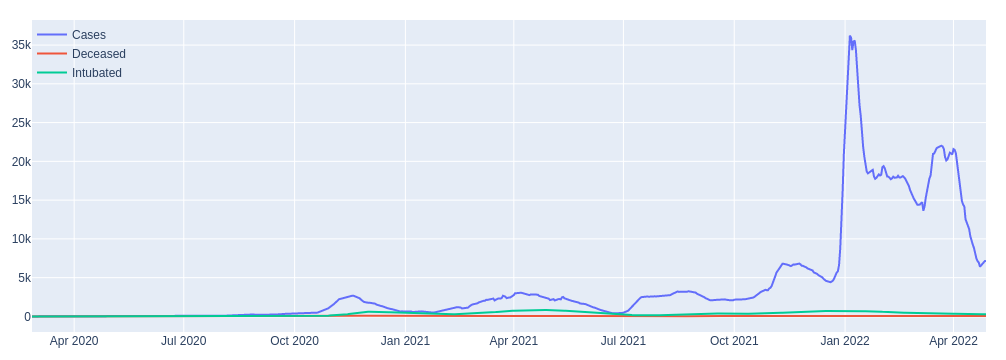

In [173]:
fig = go.Figure()

categories = ['cases', 'deceased', 'intubated']

for cat in categories:
    fig.add_trace(go.Scatter(
        x=df_weekly_stats['date'].to_list(),
        y=df_weekly_stats[cat].to_list(),
        mode='lines', # +markers
        name=cat.capitalize(),
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'legend': {'x': 0, 'y': 1, 'bgcolor': 'rgba(0,0,0,0)'},
    'hovermode': 'x unified'
})

fig.show()

#### Evolution (running total)

Line chart

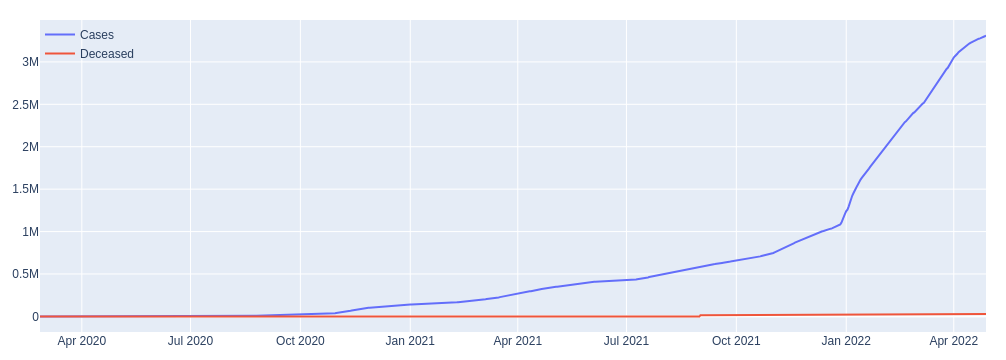

In [174]:
fig = go.Figure()

categories = ['calculated_cases_cumsum', 'calculated_deceased_cumsum', 'calculated_intubated_cumsum']
categories = ['total_cases', 'total_deceased',]

for cat in categories:
    fig.add_trace(go.Scatter(
        x=df_daily_stats['date'].to_list(),
        y=df_daily_stats[cat].to_list(),
        mode='lines', # +markers
        name=cat.split('_')[1].capitalize(),
    ))

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'legend': {'x': 0, 'y': 1, 'bgcolor': 'rgba(0,0,0,0)'},
    'hovermode': 'x unified'
})

fig.show()

#### Daily cases, deceased and fatality rate

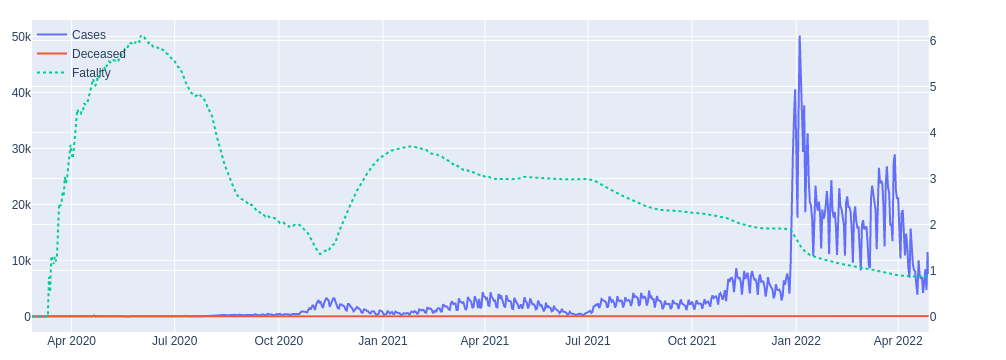

In [175]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

categories = ['cases', 'deceased']

for cat in categories:
    fig.add_trace(
        go.Scatter(
            x=df_daily_stats['date'].to_list(),
            y=df_daily_stats[cat].to_list(),
            mode='lines', # +markers
            name=cat.capitalize()
        ),
        secondary_y=False,
    )

fig.add_trace(
    go.Scatter(
        x=df_daily_stats['date'].to_list(),
        y=df_daily_stats['calculated_fatality'].to_list(),
        mode='lines', # +markers
        name='Fatality',
        line_dash='dot'
    ),
    secondary_y=True,
)

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'yaxis2': {'fixedrange': True, 'hoverformat': '.2f'},
    'hovermode': 'x unified',
    'legend': {'x': 0, 'y': 1, 'bgcolor': 'rgba(0,0,0,0)'},
})

fig.show()

#### Daily cases, tests and positivity rate

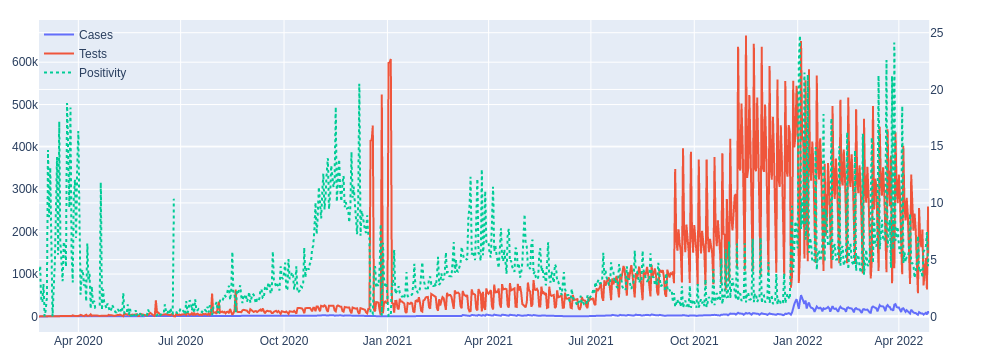

In [176]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Scatter(
    x=df_daily_stats['date'].to_list(),
    y=df_daily_stats['cases'].to_list(),
    mode='lines', # +markers
    name='Cases'
),secondary_y=False)

fig.add_trace(go.Scatter(
    x=df_daily_stats['date'].to_list(),
    y=df_daily_stats['calculated_tests_total'].to_list(),
    mode='lines', # +markers
    name='Tests'
),secondary_y=False)

fig.add_trace(go.Scatter(
    x=df_daily_stats['date'].to_list(),
    y=df_daily_stats['calculated_positivity'].to_list(),
    mode='lines', # +markers
    name='Positivity',
    line_dash='dot',
),secondary_y=True)

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'yaxis2': {'fixedrange': True, 'hoverformat': '.2f'},
    'hovermode': 'x unified',
    'legend': {'x': 0, 'y': 1, 'bgcolor': 'rgba(0,0,0,0)'},
})

fig.show()

#### Daily stats combined

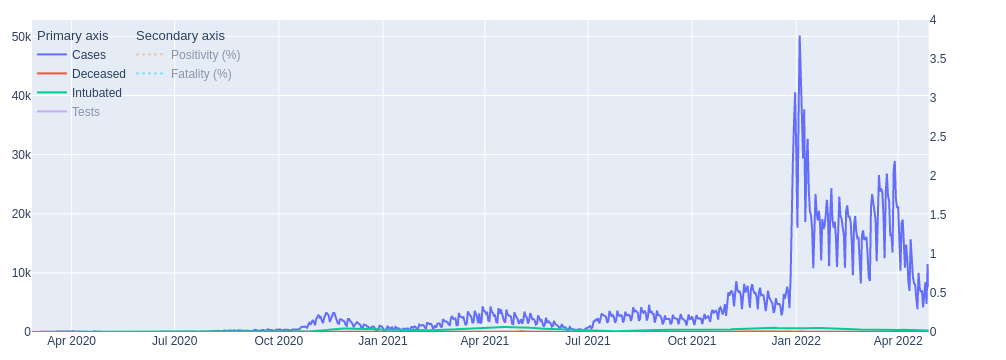

In [182]:
fig = make_subplots(specs=[[{"secondary_y": True}]])

categories = ['cases', 'deceased', 'intubated']
secondary = ['positivity', 'fatality']

for cat in categories:
    fig.add_trace(
        go.Scatter(
            x=df_daily_stats['date'].to_list(),
            y=df_daily_stats[cat].to_list(),
            mode='lines', # +markers
            name=cat.capitalize(),
            legendgroup="group1",
            legendgrouptitle_text="Primary axis",
        ),
        secondary_y=False,
    )

fig.add_trace(
    go.Scatter(
        x=df_daily_stats['date'].to_list(),
        y=df_daily_stats['calculated_tests_total'].to_list(),
        mode='lines', # +markers
        name='Tests',
        visible='legendonly',
        legendgroup="group1",
    ),
    secondary_y=False,
)

for item in secondary:
    fig.add_trace(
        go.Scatter(
            x=df_daily_stats['date'].to_list(),
            y=df_daily_stats['calculated_'+item.lower()].to_list(),
            mode='lines', # +markers
            name=item.capitalize() + " (%)",
            line_dash='dot',
            legendgroup="group2",
            legendgrouptitle_text="Secondary axis",
            visible='legendonly'
        ),
        secondary_y=True,
    )

fig.update_layout({
    'margin': {'l': 20, 'b': 20, 't': 20, 'r': 20},
    'yaxis': {'fixedrange': True, 'hoverformat': ','},
    'yaxis2': {'fixedrange': True, 'hoverformat': '.2f','showgrid': False },
    'hovermode': 'x unified',
    'legend': {'x': 0, 'y': 1, 'groupclick': 'toggleitem', 'orientation': 'h', 'bgcolor': 'rgba(0,0,0,0)'},
})

fig.update_yaxes(rangemode='tozero')

fig.show()

## Export data

Uncomment to save final (processed) files

In [ ]:
# df_daily_stats.to_csv('data/daily_stats.csv', index=False)

In [ ]:
# df_three_days_stats.to_csv('data/three_days_stats.csv', index=False)

In [ ]:
# df_weekly_stats.to_csv('data/weekly_stats.csv', index=False)

In [ ]:
# df_total_stats.to_csv('data/total_stats.csv', index=False)